In [313]:
import numpy as np
import math 
import sympy as sym
from sympy import *
import matplotlib.pyplot as plt
%matplotlib inline

Writing a script to describe the nodes:

In [314]:
nodes = 49
number_dofs = nodes * 2
dofs = np.zeros([number_dofs,1])
force_matrix = np.zeros(number_dofs)

def function(i):
    if i <= 7:
        x = 0 + 1*(i-1)
        y = 0
        return x, y

    elif i <= 14:
        x = 0 + 1*(i-8)
        y = 0.5
        return x, y

    elif i <= 21:
        x = 0 + 1 * (i - 15)
        y = 1
        return x, y

    elif i <= 28:
        x = 0 + 1 * (i - 22)
        y = 1.5
        return x, y

    elif i <= 35:
        x = 0 + 1 * (i - 29)
        y = 2
        return x, y

    elif i <= 42:
        x = 0 + 1 * (i - 36)
        y = 2.5
        return x, y

    else:
        x = 0 + 1 * (i - 43)
        y = 3
        return x, y

Writing a script to denote the node coordinates for each element.

In [315]:
elements = 36
element_connection_matrix = []

for j in range(0, 6):
    element_connections = [(1+j), (2+j), (9+j), (8+j)]
    element_connection_matrix.append(element_connections)
    
for j in range(0, 6):    
    element_connections2 = [(8+j), (9+j), (16+j), (15+j)]
    element_connection_matrix.append(element_connections2)
    
for j in range(0, 6):    
    element_connections3 = [(15+j), (16+j), (23+j), (22+j)]
    element_connection_matrix.append(element_connections3)

for j in range(0, 6):
    element_connections4 = [(22+j), (23+j), (30+j), (29+j)]
    element_connection_matrix.append(element_connections4)

for j in range(0, 6):
    element_connections5 = [(29+j), (30+j), (37+j), (36+j)]
    element_connection_matrix.append(element_connections5)

for j in range(0, 6):
    element_connections6 = [(36+j), (37+j), (44+j), (43+j)]
    element_connection_matrix.append(element_connections6)


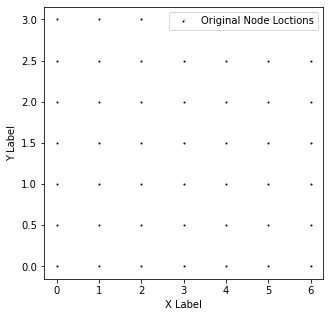

In [316]:
node_locations = [function(i) for i in range(1, int(nodes+1))]

def coords_x(i):
    x = node_locations[i][0]
    return x

def coords_y(i):
    y = node_locations[i][1]
    return y

x = [coords_x(i) for i in range(nodes)]
y = [coords_y(i) for i in range(nodes)]


def image_view(x, y):
    fig, ax = plt.subplots(figsize=(5,5))

    ax.scatter(x, y, color='black', s=1)

    ax.legend(['Original Node Loctions'], loc='upper right')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')

    plt.show(block=True)
    plt.show()

image_view(x, y)

Applying the known parameters to E and v to obtain the D matrix. Note - this is also $E_{ijkl}$

In [317]:
E = 204000 # N/mm^2
v = 0.29

def D_matrix(E, v):
    value_d_matrix = E/(1-v**2) * np.array([[1, v, 0], [v, 1, 0], [0, 0, (1-v)/2]])
    return value_d_matrix

E_ijkl = D_matrix(E, v)

Derivative functions made using sympy

In [318]:
def differentiation_wrtx(val):
    x = sym.Symbol('x')
    derivative = sym.diff(val)
    return derivative

def differentiation_wrty(val):
    y = sym.Symbol('y')
    derivative = sym.diff(val)
    return derivative

def differentiation_wrtxi(val):
    xi = sym.Symbol('xi')
    derivative = sym.diff(val)
    return derivative

def differentiation_wrteta(val):
    eta = sym.Symbol('eta')
    derivative = sym.diff(val)
    return derivative

In [319]:
def individual_phi_matrix(xi, eta):
    phi_1 = 1/4*(1-xi)*(1-eta)
    phi_2 = 1/4*(1+xi)*(1-eta)
    phi_3 = 1/4*(1+xi)*(1+eta)
    phi_4 = 1/4*(1-xi)*(1+eta)
    phi_matrix = [phi_1, phi_2, phi_3, phi_4]
    return phi_matrix

The next block of code allows for derivations of the interpolations with respect to $\xi$.

In [320]:
def phi_matrix_comma_i(eta):
    xi = sym.Symbol('xi')
    phi_1_i = diff(1/4*(1-eta)- 1/4*(1-eta)*xi)
    phi_2_i = diff(1/4*(1-eta)+ 1/4*(1-eta)*xi)
    phi_3_i = diff(1/4*(1+eta)+ 1/4*(1+eta)*xi)
    phi_4_i = diff(1/4*(1+eta)- 1/4*(1+eta)*xi)
    phi_matrix_comma_i = [phi_1_i, phi_2_i, phi_3_i, phi_4_i]
    return phi_matrix_comma_i

The next block of code allows for derivations of the interpolations with respect to $\eta$.

In [321]:
def phi_matrix_comma_j(xi):
    eta = sym.Symbol('eta')
    phi_1_j = diff(1/4*(1-xi)- 1/4*(1-xi)*eta)
    phi_2_j = diff(1/4*(1+xi)- 1/4*(1+xi)*eta)
    phi_3_j = diff(1/4*(1+xi)+ 1/4*(1+xi)*eta)
    phi_4_j = diff(1/4*(1-xi)+ 1/4*(1-xi)*eta)
    phi_matrix_comma_j = [phi_1_j, phi_2_j, phi_3_j, phi_4_j]
    return phi_matrix_comma_j

Using 1x1 Gaussian integration of the elements, $\xi$ and $\eta$ have a value of 0. However this must be applied manually as a global allocation of values to $\xi$ and $\eta$ will disrupt the differential equations.

The following block of code allowcates the rest of the strain energy equation to the relevant matrix spaces. IT is based on one element with the arbitary values allocated earlier.

In [322]:
class strain_energy:
    
    individual_k = []
        
    for i in range(0, len(element_connection_matrix)):
    
        element = element_connection_matrix[i]
 
        x_1 = element[0]
        x_2 = element[1]
        x_3 = element[2]
        x_4 = element[3]
        
        y_1 = element[0]
        y_2 = element[1]
        y_3 = element[2]
        y_4 = element[3]

        element_x_coords = [x[x_1-1], x[x_2-1], x[x_3-1], x[x_4-1]]
        element_y_coords = [y[y_1-1], y[y_2-1], y[y_3-1], y[y_4-1]]
  
        J_11 = phi_matrix_comma_i(1)[0] * element_x_coords[0]  + phi_matrix_comma_i(1)[1] * element_x_coords[1] + phi_matrix_comma_i(1)[2] * element_x_coords[2] + phi_matrix_comma_i(1)[3] * element_x_coords[3] 
        J_12 = phi_matrix_comma_i(1)[0] * element_y_coords[0]  + phi_matrix_comma_i(1)[1] * element_y_coords[1] + phi_matrix_comma_i(1)[2] * element_y_coords[2] + phi_matrix_comma_i(1)[3] * element_y_coords[3] 
        J_21 = phi_matrix_comma_j(1)[0] * element_x_coords[0]  + phi_matrix_comma_j(1)[1] * element_x_coords[1] + phi_matrix_comma_j(1)[2] * element_x_coords[2] + phi_matrix_comma_j(1)[3] * element_x_coords[3] 
        J_22 = phi_matrix_comma_j(1)[0] * element_y_coords[0]  + phi_matrix_comma_j(1)[1] * element_y_coords[1] + phi_matrix_comma_j(1)[2] * element_y_coords[2] + phi_matrix_comma_j(1)[3] * element_y_coords[3] 

        J = np.array([[J_11, J_12], [J_21, J_22]])
        det_J = J[0][0]*J[1][1] - J[0][1]*J[1][0]
        J_minus_1 = np.array([[J_22, J_21], [J_12, J_11]]) * 1/det_J

        d_N_1_d = np.matmul(J_minus_1, [phi_matrix_comma_i(0)[0], phi_matrix_comma_j(0)[0]])
        d_N_2_d = np.matmul(J_minus_1, [phi_matrix_comma_i(0)[1], phi_matrix_comma_j(0)[1]])
        d_N_3_d = np.matmul(J_minus_1, [phi_matrix_comma_i(0)[2], phi_matrix_comma_j(0)[2]])
        d_N_4_d = np.matmul(J_minus_1, [phi_matrix_comma_i(0)[3], phi_matrix_comma_j(0)[3]])


        B_matrix = np.array([[d_N_1_d[0], 0, d_N_2_d[0], 0, d_N_3_d[0], 0, d_N_4_d[0], 0], [0, d_N_1_d[1], 0, d_N_2_d[1], 0, d_N_3_d[1], 0, d_N_4_d[1]], [d_N_1_d[1], d_N_1_d[0], d_N_2_d[1], d_N_2_d[0], d_N_3_d[1], d_N_3_d[0], d_N_4_d[1], d_N_4_d[0]]])

        B_T = np.transpose(B_matrix)

        # Carrying out the integral equations with the summation varation:
        H_i = 2
        H_j = 2
        I = H_i * H_j * det_J

        k = I * np.matmul(B_T, np.matmul(E_ijkl,B_matrix))

        individual_k.append(k)

There is a total of 36 elements so also 36 values of local matrix, k. Each of these must be split into the appropriate global position.

In [323]:
Global_matrix = np.zeros([number_dofs, number_dofs])

for i in range(0, len(strain_energy.individual_k)):
    k_e = strain_energy.individual_k[i]
    element_nodes = element_connection_matrix[i]

    element_node_1 = element_nodes[0]
    positioning_node_1_global = [int((element_node_1*2)-1), int(element_node_1*2)]

    element_node_2 = element_nodes[1]
    positioning_node_2_global = [int((element_node_2*2)-1), int(element_node_2*2)]

    element_node_3 = element_nodes[2]
    positioning_node_3_global = [int((element_node_3*2)-1), int(element_node_3*2)]

    element_node_4 = element_nodes[3]
    positioning_node_4_global = [int((element_node_4*2)-1), int(element_node_4*2)]

    relevant_dofs = [positioning_node_1_global, positioning_node_2_global, positioning_node_3_global, positioning_node_4_global]
    dofs_vec = np.concatenate(relevant_dofs).ravel()

    for m in range(0, len(k_e[0])):
        col_val = dofs_vec[m]
        
        for j in range(0, len(k_e[0])):
            k_e_m_j = k_e[m][j]
            row_val = dofs_vec[j]
            Global_matrix[col_val-1][row_val-1] += k_e_m_j

In [324]:
class load_conditions:
    
    forces_applied_to = [7, 28, 42, 56, 70, 82, 98]
    forces = [7, 6.5, 6, 5.5, 5, 4.5, 4.0]

    for i in range(0, len(forces)):
        force_matrix[forces_applied_to[i]-1] = forces[i]
        
    b_i = force_matrix

In [325]:
inverse_k = np.linalg.pinv(Global_matrix)

The following block of code applies the forces to the known stiffness matrix in order to determine displacement values at the known loading locations.

In [326]:
for i in range(0, len(load_conditions.forces_applied_to)):
    val = load_conditions.forces_applied_to[i]
    dofs[val-1] += np.matmul(inverse_k[val-1], load_conditions.b_i)

In [327]:
final_forces = np.matmul(Global_matrix, dofs)
final_dofs = np.matmul(inverse_k, final_forces)

In [328]:
x_deflec = []
y_deflec = []

for i in range(0, len(dofs), 2):
    x_dofs = final_dofs[i]
    y_dofs = final_dofs[i+1]
    x_deflec.append(x_dofs)
    y_deflec.append(y_dofs)

In [329]:
final_x_array = [x[i] + x_deflec[i] for i in range(len(x))]
final_x = np.concatenate(final_x_array).ravel()
final_y_array = [y[i] + y_deflec[i] for i in range(len(y))]
final_y = np.concatenate(final_y_array).ravel()

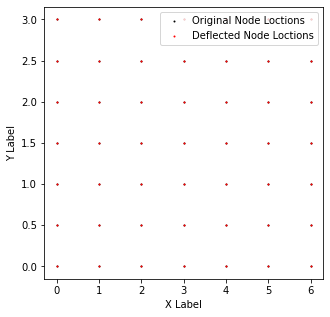

In [330]:
def image_view(x, y, final_x, final_y):
    fig, ax = plt.subplots(figsize=(5,5))

    ax.scatter(x, y, color='black', s=1)
    ax.scatter(final_x, final_y, color='red', s=1)

    ax.legend(['Original Node Loctions', 'Deflected Node Loctions'], loc='upper right')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')

    plt.show(block=True)
    plt.show()

image_view(x, y, final_x, final_y)

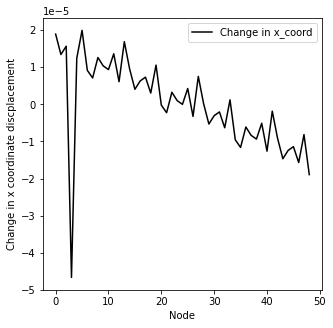

In [331]:
x_difference = x - final_x
y_axis = x_difference
x_axis = [[i] for i in range(0,len(x_difference))]

def image_view(x_axis, y_axis):
    fig, ax = plt.subplots(figsize=(5,5))

    ax.plot(x_axis, y_axis, color='black')

    ax.legend(['Change in x_coord'], loc='upper right')

    ax.set_xlabel('Node')
    ax.set_ylabel('Change in x coordinate discplacement')

    plt.show(block=True)
    plt.show()

image_view(x_axis, y_axis)